# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

city_url = f"{url}&q={cities[0]}"

requests.get(city_url).json()

{'coord': {'lon': -79.2353, 'lat': 42.097},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 16.8,
  'feels_like': 16.89,
  'temp_min': 11.4,
  'temp_max': 19.29,
  'pressure': 1018,
  'humidity': 90},
 'visibility': 10000,
 'wind': {'speed': 2.57, 'deg': 200},
 'clouds': {'all': 75},
 'dt': 1691052924,
 'sys': {'type': 2,
  'id': 2008828,
  'country': 'US',
  'sunrise': 1691057512,
  'sunset': 1691109259},
 'timezone': -14400,
 'id': 5122534,
 'name': 'Jamestown',
 'cod': 200}

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities 
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | idfu
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | haiku-pauwela
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | clorinda
Processing Record 10 of Set 1 | osinovo
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | greymouth
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | puerto ayora
Processing Record 2

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,19.29,90,75,2.57,US,1691052924
1,idfu,24.9803,32.8747,41.61,11,13,1.38,EG,1691052932
2,port lincoln,-34.7333,135.8667,18.81,59,100,4.87,AU,1691052932
3,port-aux-francais,-49.3500,70.2167,3.58,91,75,14.07,TF,1691052932
4,hermanus,-34.4187,19.2345,18.78,52,18,2.24,ZA,1691052933


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,19.29,90,75,2.57,US,1691052924
1,idfu,24.9803,32.8747,41.61,11,13,1.38,EG,1691052932
2,port lincoln,-34.7333,135.8667,18.81,59,100,4.87,AU,1691052932
3,port-aux-francais,-49.3500,70.2167,3.58,91,75,14.07,TF,1691052932
4,hermanus,-34.4187,19.2345,18.78,52,18,2.24,ZA,1691052933


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

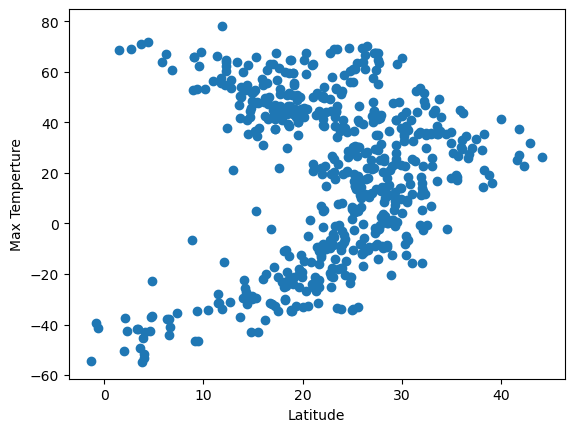

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperture")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

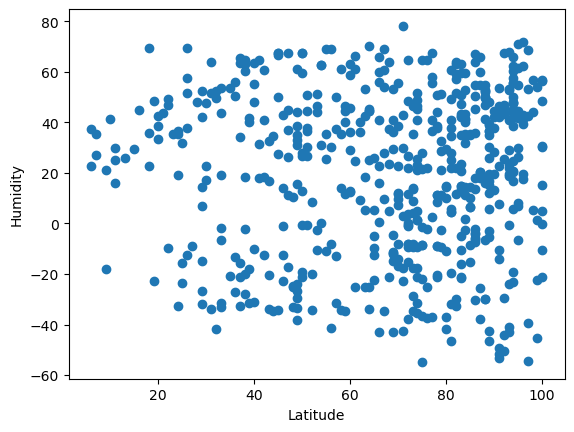

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

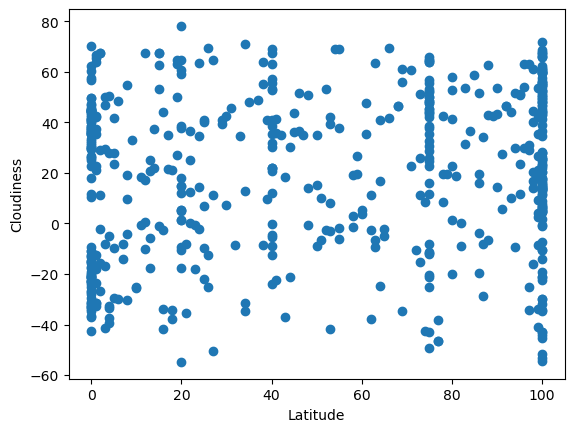

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

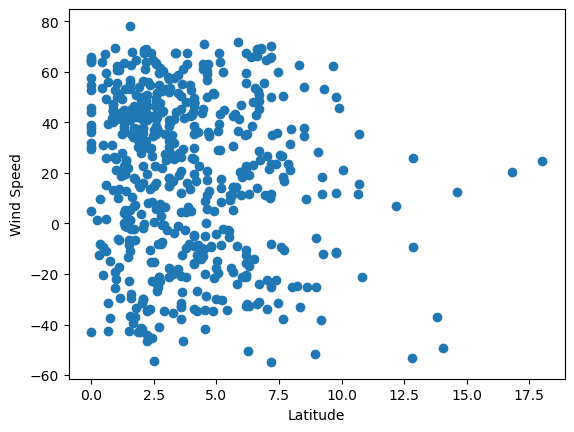

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
def linear_regress(x, y, eqn_coordinates): #eqn_coordinates is a tuple representing coordinates
    #st.pearsonr is used to calculate correlation coefficient and p-value
    r = st.pearsonr(x, y)
    print(f"The r-value is {r[0]}")

    #Linear Regression, slope, intercept
    (slope, intercept, rvalue, pvalue, stderr)=st.linregress (x,y)

    #generate the regression line
    regress_values = x*slope + intercept

    #create equation of regression line
    line_eq = f"y={slope:2f}x + {intercept:2f}"

    #Plotting regression_line
    plt.plot(x,regress_values, "r-")

    #annotation the equation
    #plt.annotate(line_eq, eqn_coordinates)

    #plot the data points
    plt.scatter(x,y)

    #set labels
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,19.29,90,75,2.57,US,1691052924
1,idfu,24.9803,32.8747,41.61,11,13,1.38,EG,1691052932
5,haiku-pauwela,20.9219,-156.3051,24.47,83,13,3.58,US,1691052933
6,talnakh,69.4865,88.3972,26.00,18,26,0.96,RU,1691052661
7,naze,28.3667,129.4833,26.51,90,100,9.05,JP,1691052934


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port lincoln,-34.7333,135.8667,18.81,59,100,4.87,AU,1691052932
3,port-aux-francais,-49.3500,70.2167,3.58,91,75,14.07,TF,1691052932
4,hermanus,-34.4187,19.2345,18.78,52,18,2.24,ZA,1691052933
8,clorinda,-25.2848,-57.7185,18.12,61,0,2.67,AR,1691052934
10,port mathurin,-19.6833,63.4167,22.75,81,86,5.08,MU,1691052935


###  Temperature vs. Latitude Linear Regression Plot

In [30]:
import scipy.stats as st
from scipy.stats import linregress


The r-value is: -0.503317771471776


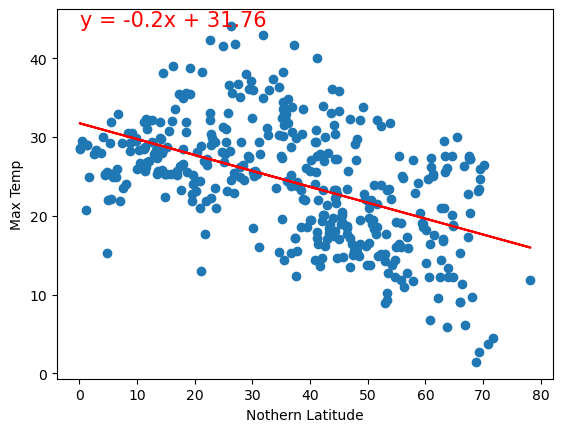

In [31]:
#Linear regression of the nothern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# The correlation coefficient (r value) is stored in the variable 'rvalue'
print("The r-value is:",rvalue)

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
plt.xlabel("Nothern Latitude")
plt.ylabel("Max Temp")
plt.show()


DISCUSSION OF RELATIONSHIP: Temperature and latitude have a fairly significant relationship, with a correlation value of -0.5033 on the Northern Latitude. Temperature and Latitude have a considerable negative link in the Northern Hemisphere, as seen by the correlation value of -0.5033. 


The r-value is:0.792895118641977


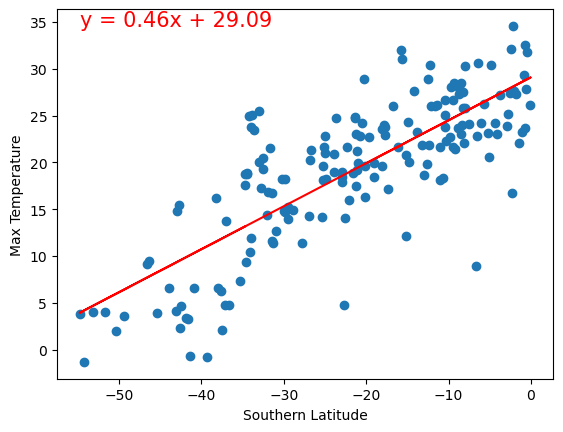

In [32]:
#Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=15, color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP:
Temperature and latitude have a fairly significant relationship, with a correlation value of -0.5033 on the Northern Latitude. Temperature and Latitude have a considerable negative link in the Northern Hemisphere, as seen by the correlation value of -0.5033. 




### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.06115741995760077


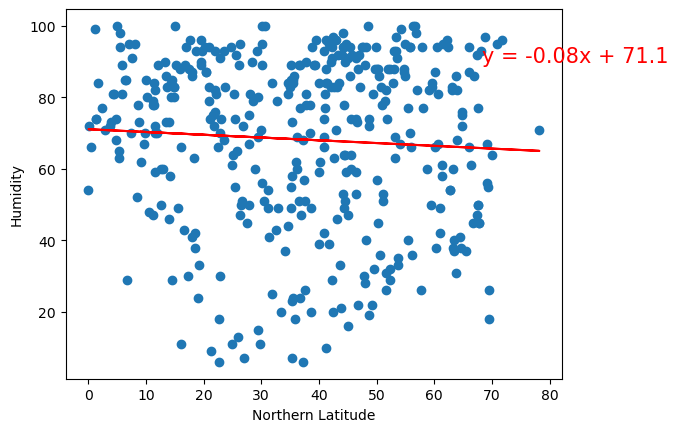

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='left')
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

Discussion of Relationship: 
Humidity and Latitude have a very weak relationship, with a correlation value of -0.061 on the Northern Latitude. In the Northern Hemisphere, the correlation value of -0.061 suggests a very little negative relationship between humidity and latitude.


The r-value is: -0.05264021088887799


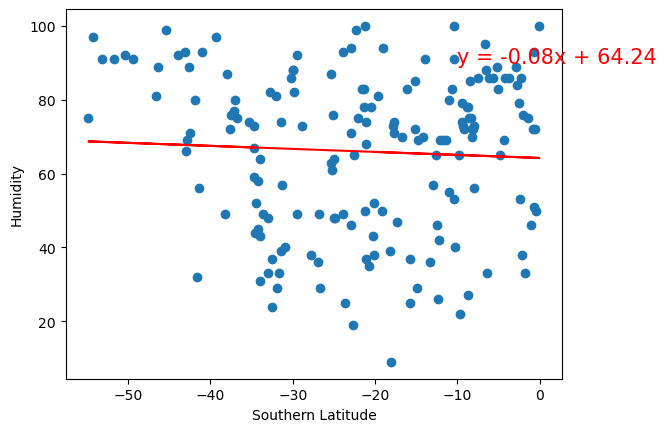

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
#Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='left')
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP: Discussion of Relationship: 
Humidity and latitude have a modest relationship, with a correlation value of -0.0526 on the Southern Latitude. Humidity and Latitude have a modest negative link in the Southern Hemisphere, as seen by the correlation value of -0.0526.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04301671664118109


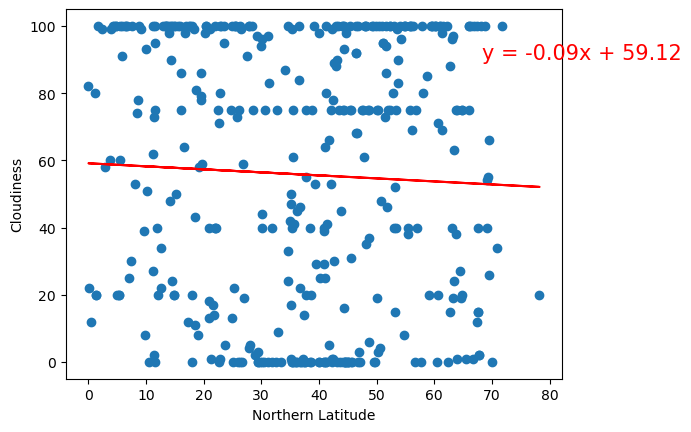

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='left')
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP: Discussion of Relationship: Cloudiness and Latitude have an extremely weak relationship, with a correlation value of -0.0430 on the Northern Latitude. Cloudiness and Latitude have an exceptionally low relationship that is negative in the Northern Hemisphere, as seen by the correlation value of -0.0430. 


The r-value is: -0.056965033066868224


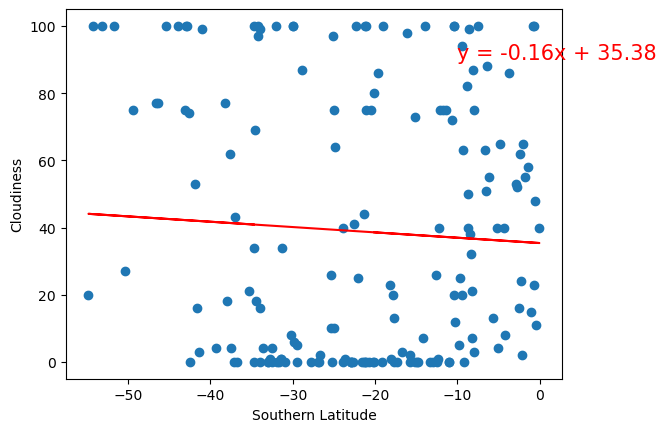

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='left')
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP: Discussion of Relationship: With a correlation of -0.0430 between cloudiness and latitude in the Northern Hemisphere, the relationship is incredibly weak. Since the correlation value is so low, there isn't much of a linear relationship between the two variables.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09865730748178195


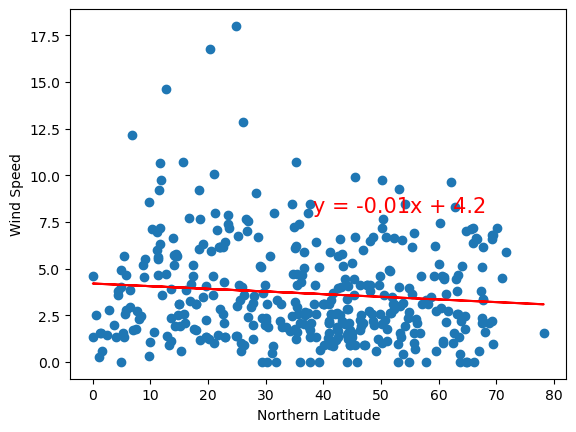

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='right')
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP:A correlation coefficient of -0.0989 shows a weak negative association between wind speed and latitude in the Northern Hemisphere. According to this correlation value, the wind speed tends to gradually decrease as we ascend the Northern Hemisphere's latitudes.


The r-value is: -0.11390252874313528


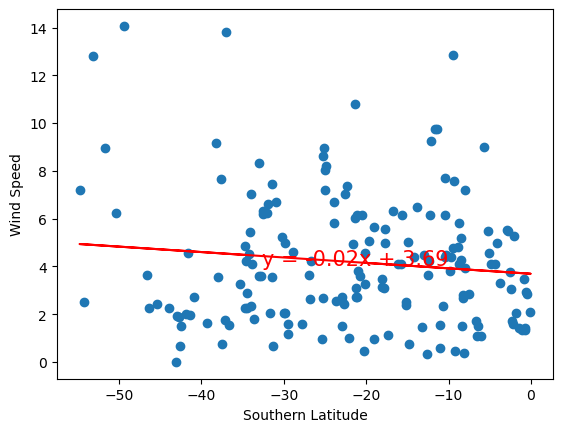

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.max() - 10, y_values.max() - 10), fontsize=15, color="red", ha='right')
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

DISCUSSION OF RELATIONSHIP:With a correlation coefficient of -0.1139, the Northern Hemisphere's wind speed and latitude show a weak negative relationship. 

